In [3]:
import nltk
import string 
import pandas
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))

stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = [
"argilla",
"batchflow",
"ckan",
"covalent",
"DataGristle",
"dataprep",
"datatest",
"doit",
"flyte",
"flytekit",
"flytectl",
"flyteadmin",
"igel",
"keras",
"klib",
"kuwala",
"networkx",
"pybossa",
"sayn",
"wptools",
"ydata",
"profiling",
"ydataprofiling",
"meza",
"cern",
"opendata",
"opendatacernch",
"ch ",
"trac",
"migrated",
"cant",
"via",
"doesnt",
"untriaged",
"closed",
"open",
"utc",
"t  z",
"core"
]
stopwords.extend(new_stopwords)
print(stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

             col1      col2
0             add  1.000000
1           error  0.876947
2             bug  0.825545
3            file  0.630841
4         dataset  0.585670
5             doc  0.585670
6            task  0.538941
7           graph  0.534268
8         feature  0.509346
9            data  0.506231
10           page  0.504673
11         update  0.442368
12  documentation  0.440810
13           node  0.437695
14           user  0.426791
15            use  0.425234
16       resource  0.414330
17            cms  0.403427
18            api  0.403427
19        support  0.392523
20           link  0.387850
21             ui  0.375389
22            new  0.370717
23           fail  0.370717
24           test  0.342679
25          using  0.336449
26         record  0.333333
27           edge  0.327103
28         create  0.322430
29       template  0.313084
30           work  0.306854
31         python  0.306854
32          issue  0.303738
33        missing  0.300623
34        example  0

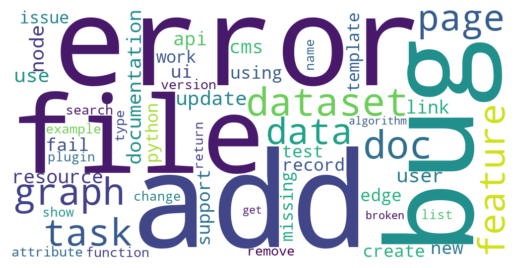

In [10]:
from clevercloud.CleverLemStem import CleverLemStem
from clevercloud.CleverStopwords import CleverStopwords
from pandas import Series

def CleverClean(text):
    """
    A preprocessor to convert all letters to lower case, and to remove all punctuations and digits from the text.  
    
    Parameters
    ----------
    text : pandas.series
        Input a pandas series of text / strings
    
    Returns
    -------
    str
        A long string containing the cleaned of version of all text
    
    Examples
    --------
    >>> sample_text = pandas.Series('Apple is MY favorite!')
    >>> CleverClean(sample_text)
    'apple is my favorite'
    
    """
    #importing string and pandas package package
    import string
    import re
    import pandas as pd
    
    #Checking if correct inputs are given 
    if not pd.api.types.is_string_dtype(text):
        raise TypeError("Input 'text' should be a panda series containing only strings")
    
    #combining strings from the panda series to one large string 
    all_strings=''
    for i in text:
        #all_strings+=str(i).replace("\t"," ").replace("\n"," ")
        all_strings+=" "
        all_strings+=re.sub(r'[^\w]', " ", i)
    

    #coverting strings to lower case
    text_low = all_strings.lower() 

    #removing all the digits from text
    text_low_noDigits = ''.join([i for i in text_low if not i.isdigit()])

    #removing all the punctuation from text using a for loop 
    prepro_text = "" #storing the complete preprocessed text in this variable 
    for i in text_low_noDigits:
        if i not in string.punctuation:
           prepro_text+=i
    
    #returning the text 
    return prepro_text

def CleverWordCloud(text, CleverStop, max_w):
  
    """
    This function generates a word cloud with customized stopwords and max words included. 
    
    Parameters
    ----------
    text : str
        Input an array of text / strings 
    
    CleverStop: set 
        Input a set of strings 

    max_w: int 
        Input an integer to indicate the maximum number of words included in the word cloud  
    
    Returns
    -------
    png image 
        Display the png image 
    
    Examples
    --------
    >>> CleverWordCloud(text, {"are", "my", "is"}, 200) 
    
    """
    from wordcloud import WordCloud
    import nltk
    if not isinstance(text, str):
        raise TypeError("Input text should be a string.")
   
    #if not isinstance(CleverStop, set):
        #raise TypeError("Input CleverStop should be a set.")
        
    if not isinstance(max_w, int):
        raise TypeError("Input max_w should be an integer.")
        
    #for item in CleverStop:
        #if not isinstance(item, str):
            #raise TypeError("Each element of the CleverStop set should be a string.")
    
    wordcloud = WordCloud(stopwords=stopwords, max_words=max_w, background_color="white", width=1000, height=500, min_word_length=2).generate(text)
    image = wordcloud.to_image()
    image.show()
    output=wordcloud.words_
    df = pd.DataFrame({'col1': list(output.keys()), 'col2': list(output.values())})
    print(df.head(50), type(df))
    return image

import pandas as pd

text = open("Data corpus.txt", "r")
test_text = pd.Series(text)


clean_text = CleverClean(test_text)
#final_text = CleverLemStem(clean_text)
#stopwords = CleverStopwords(set(new_stopwords))


import matplotlib.pyplot as plt

WordCloud = CleverWordCloud(clean_text, stopwords, max_w=50)
plt.figure()
plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()